# 1. Perkenalan

- Nama        : Sanggeni Gali Wardhana
- Batch       : FTDS-011
- Dataset     : heart failure dataset
- Objective   : death by heart failure prediction

**GC 3**

**Dibawah ini adalah query pada bigquery Google Cloud Platform :**

select *
from `ftds-hacktiv8-project.phase1_assignments.heart-failure`

Pada data ini terdapat data pasien baik yang masih hidup maupun telah meninggal selama melakukan follow up kesehatan selama menjalani penyembuhan karena penyakit jantung (gagal jantung), pada data ini terdapat data penting dari pasien yang membantu dokter dalam melakukan follow up terhadap kondisi pasien saae pengobatan. Data yang tercatat tersebut antara lain :
- age = umur
- anemia = Decrease of red blood cells or hemoglobin (boolean)
- creatinine_phosphokinase = Level of the CPK enzyme in the blood (mcg/L)
- diabetes = If the patient has diabetes (boolean)
- ejection_fraction = Percentage of blood leaving the heart at each contraction (percentage)
- high blood pressure = If the patient has hypertension (boolean)
- platelets = Platelets in the blood (kiloplatelets/mL)
- serum_creatinine = Level of serum creatinine in the blood (mg/dL)
- serum_sodium = Level of serum sodium in the blood (mEq/L)
- sex = Woman or man (binary)
- smoking = If the patient smokes or not (boolean)
- time = Follow-up period (days)
- DEATH_EVENT = If the patient deceased during the follow-up period (boolean)

Objective yang ditentukan adalah :

- **Menentukan fitur yang berkorelasi atau mempengaruhi kematian pasien selama masa follow-up.**
- **Membuat model machine learning menggunakan beberapa algoritma random forest dan gradient boosting, lalu membandingkan performa kedua algoritma tersebut dalam memprediksi kemungkinan pasien meninggal selama masa follow up penyembuhan.**

---
# 2. Import Library

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
 
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix, roc_auc_score,f1_score

import pickle
import ast

---
# 3. Data Loading

In [2]:
data = pd.read_csv('h8dsft_P1G3_Sanggeni_Gali_Wardhana.csv')
pd.set_option('display.max_columns', None)
data.head(5)

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  42.0        1                       250         1                 15   
1  46.0        0                       168         1                 17   
2  65.0        1                       160         1                 20   
3  53.0        1                        91         0                 20   
4  50.0        1                       582         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    0   213000.0               1.3           136    0   
1                    1   271000.0               2.1           124    0   
2                    0   327000.0               2.7           116    0   
3                    1   418000.0               1.4           139    0   
4                    1   279000.0               1.0           134    0   

   smoking  time  DEATH_EVENT  
0        0    65            1  
1        0   100            1  
2        0     8            1  
3        0    43            1  
4        0   186            0

In [3]:
data.tail(5)

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
294  63.0        1                       122         1                 60   
295  45.0        0                       308         1                 60   
296  70.0        0                        97         0                 60   
297  53.0        1                       446         0                 60   
298  50.0        0                       582         0                 62   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
294                    0  267000.00               1.2           145    1   
295                    1  377000.00               1.0           136    1   
296                    1  220000.00               0.9           138    1   
297                    1  263358.03               1.0           139    1   
298                    1  147000.00               0.8           140    1   

     smoking  time  DEATH_EVENT  
294        0   147            0  
295        0   186            0  
296        0   186            0  
297        0   215            0  
298        1   192            0

In [4]:
data_copy=data.copy()

Code diatas adalah step untuk melakukan load data.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
data.isnull().sum().sum()

0

Berdasarkan data.info() diatas, terdapat total 12 kolom dengan 299 row pada setiap kolomnya. Serta berdasarkan data diatas, semua kolom telah terbebas dari missing value, namun akan dicek kembali pada step selanjutnya.

In [7]:
data.describe().T

count           mean           std      min  \
age                       299.0      60.833893     11.894809     40.0   
anaemia                   299.0       0.431438      0.496107      0.0   
creatinine_phosphokinase  299.0     581.839465    970.287881     23.0   
diabetes                  299.0       0.418060      0.494067      0.0   
ejection_fraction         299.0      38.083612     11.834841     14.0   
high_blood_pressure       299.0       0.351171      0.478136      0.0   
platelets                 299.0  263358.029264  97804.236869  25100.0   
serum_creatinine          299.0       1.393880      1.034510      0.5   
serum_sodium              299.0     136.625418      4.412477    113.0   
sex                       299.0       0.648829      0.478136      0.0   
smoking                   299.0       0.321070      0.467670      0.0   
time                      299.0     130.260870     77.614208      4.0   
DEATH_EVENT               299.0       0.321070      0.467670      0.0   

                               25%       50%       75%       max  
age                           51.0      60.0      70.0      95.0  
anaemia                        0.0       0.0       1.0       1.0  
creatinine_phosphokinase     116.5     250.0     582.0    7861.0  
diabetes                       0.0       0.0       1.0       1.0  
ejection_fraction             30.0      38.0      45.0      80.0  
high_blood_pressure            0.0       0.0       1.0       1.0  
platelets                 212500.0  262000.0  303500.0  850000.0  
serum_creatinine               0.9       1.1       1.4       9.4  
serum_sodium                 134.0     137.0     140.0     148.0  
sex                            0.0       1.0       1.0       1.0  
smoking                        0.0       0.0       1.0       1.0  
time                          73.0     115.0     203.0     285.0  
DEATH_EVENT                    0.0       0.0       1.0       1.0

1. Pada kolom age dapat terlihat bahwa nilai mean dan nilai median memiliki nilai yang mirip, hal ini menandakan bahwa data tersebut terdistribusi normal.
2. Pada kolom diabetes, dapat diambil kesimpulan bahwa pasien yang melakukan followup lebih banyak yang tidak mengidap diabetes.
3. Selain itu pada kolom "smoking" kita tahu bahwa merokok juga dapat memperkuat resiko penyakit jantung, namun berdasarkan data pasien yang mengalami follow up lebih banyak yang tidak merokok, hal ini cukup menarik, dan akan kita explor lebih lanjut dan dibandingkan dengan terjadinya kematian pasien saat menjalani pengobatan.

---
# 4. Exploratory Data Analysis (EDA)

In [8]:
data.head(4)

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  42.0        1                       250         1                 15   
1  46.0        0                       168         1                 17   
2  65.0        1                       160         1                 20   
3  53.0        1                        91         0                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    0   213000.0               1.3           136    0   
1                    1   271000.0               2.1           124    0   
2                    0   327000.0               2.7           116    0   
3                    1   418000.0               1.4           139    0   

   smoking  time  DEATH_EVENT  
0        0    65            1  
1        0   100            1  
2        0     8            1  
3        0    43            1

## 4.1 Check Data Death_event

DEATH_EVENT (Yes) : 32.10702341137124 %
DEATH_EVENT (No) : 67.89297658862876 %


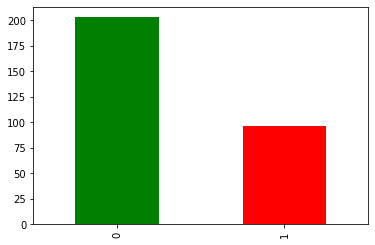

In [9]:
data['DEATH_EVENT'].value_counts().plot(kind="bar", color=("green","red"))
yes=data[data['DEATH_EVENT']==1]["DEATH_EVENT"].count()
no=data[data['DEATH_EVENT']==0]["DEATH_EVENT"].count()
print("DEATH_EVENT (Yes) :",yes/(yes+no)*100 , "%")
print("DEATH_EVENT (No) :",no/(yes+no)*100 , "%")

Berdasarkan visualisasi data diatas, dapat terlihat bahwa terdapat imbalance dimana lebih banyak data yang masih hidup daripada yang meninggal selama menjalani pengobatan (imbalance). Dengan presentase data sebagai berikut :
- DEATH_EVENT (Yes) : 32.10702341137124 %
- DEATH_EVENT (No) : 67.89297658862876 %

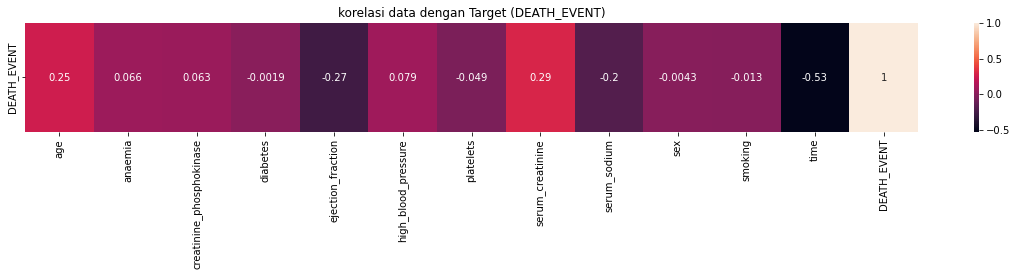

In [10]:
plt.figure(figsize=(20,2))
plt.title("korelasi data dengan Target (DEATH_EVENT)")
sns.heatmap(data.corr().loc[["DEATH_EVENT"]], annot=True)
plt.show()
# data.corr().loc[["DEATH_EVENT"]]

Berdasarkan koefisien korelasi (heatmap) diatas, terlihat bahwa target memiliki korelasi yang cukup tinggi dengan beberapa fitur, namun akan kita cek kembali.

## 4.2 Check apakah age (umur) berkorelasi dengan kematian pasien?

In [11]:
print("Age Min :",data['age'].min())
print("Age Max :",data['age'].max())

Age Min : 40.0
Age Max : 95.0


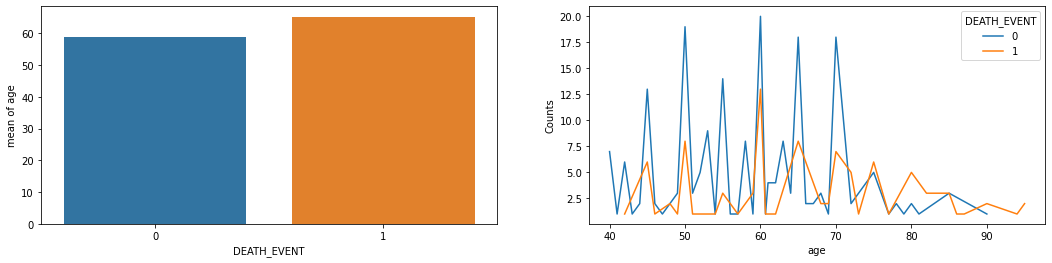

In [12]:
plt.figure(figsize=(18,4))
plt.subplot(121)
agdeb=data.groupby(['DEATH_EVENT'])['age'].mean().sort_values(ascending=False).reset_index(name='mean of age')
sns.barplot(data=agdeb, x='DEATH_EVENT', y='mean of age')

plt.subplot(122)
agdel=data.groupby(['age','DEATH_EVENT'])['DEATH_EVENT'].count().reset_index(name='Counts')
sns.lineplot(data=agdel, x='age', y='Counts', hue='DEATH_EVENT' )
plt.ylabel("Counts")
plt.show()


In [13]:
np.corrcoef(data.DEATH_EVENT,data.age)[0,1]

0.25372854308800363

- Berdasarkan data diatas, dapat dilihat bahwa pasien yang mengalami kematian memiliki rata-rata umur yang lebih tinggi daripada yang masih hidup.
- Dari lineplot kita dapat melihat bahwa jumlah tertinggi yang sedang mengalami pengobatan adalah pada usia 60 tahun.
- Berdasarkan penalaran kita juga dapat menyimpulkan bahwa umur yang lebih tua juga akan menyebabkan kondisi tubuh makin lemah dan kematian dapat terjadi.

## 4.3 Apakah anemia dapat meningkatkan resiko kematian gagal jantung?

pada bagian ini akan kita teliti apakah gender mempengaruhi kecenderungan untuk dapat membayarkan tagihan pada bulan selanjutnya?

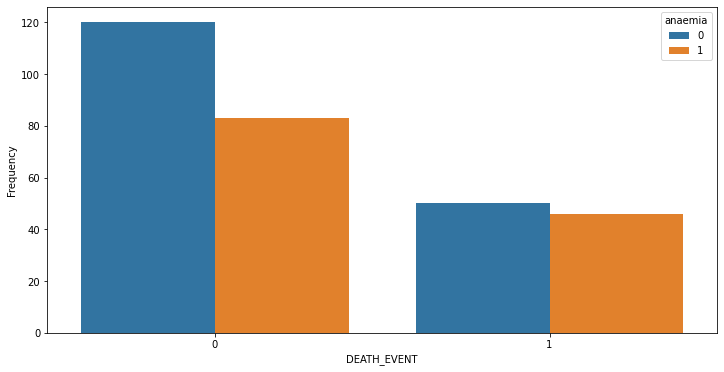

In [14]:
plt.figure(figsize=(12,6))
andet=data.groupby(['anaemia', 'DEATH_EVENT'])['DEATH_EVENT'].count().reset_index(name='Counts')
sns.barplot(x='DEATH_EVENT', y='Counts', hue='anaemia',data=andet)
plt.ylabel("Frequency")
plt.show()


- Penderita anemia tersebar cukup banyak pada pasien yang sedang menjalani pengobatan
- Penyakit anemia juga meningkatkan resiko kematian karena gagal jantung, pada death event (1) dapat terlihat bahwa jumlah yang pengidap anemia yang meninggal memiliki jumlah yang hampir sama dengan yang tidak mengidap anemia. 

## 4.4 Cek apakah creatinine_phosphokinase berkorelasi dengan kematian pasien?

In [15]:
data.keys()

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

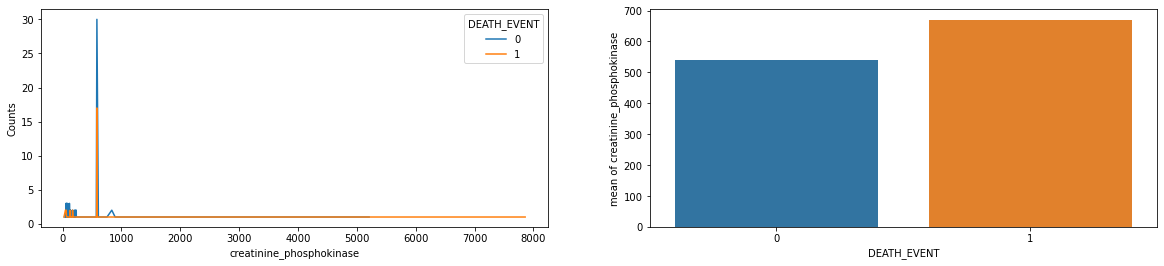

In [16]:
plt.figure(figsize=(20,4))
plt.subplot(121)
cpde=data.groupby(['creatinine_phosphokinase','DEATH_EVENT'])['DEATH_EVENT'].count().reset_index(name='Counts')
sns.lineplot(data=cpde, x='creatinine_phosphokinase', y='Counts', hue='DEATH_EVENT' )
plt.ylabel("Counts")

plt.subplot(122)
cpdel=data.groupby(['DEATH_EVENT'])['creatinine_phosphokinase'].mean().sort_values(ascending=False).reset_index(name='mean of creatinine_phosphokinase')
sns.barplot(data=cpdel, x='DEATH_EVENT', y='mean of creatinine_phosphokinase')
plt.show()

- Berdasarkan lineplot terdapat satu event yang sangat tinggi dimana pasien yang jumlah yang sama pada nilai +/- 700.
- Berdasarkan barplot pasien yang meninggal memiliki rata-rata creatinine_phosphokinase yang cukup tinggi dari pada yang masih hidup

## 4.5 Cek apakah time memiliki korelasi dengan kematian pasien?

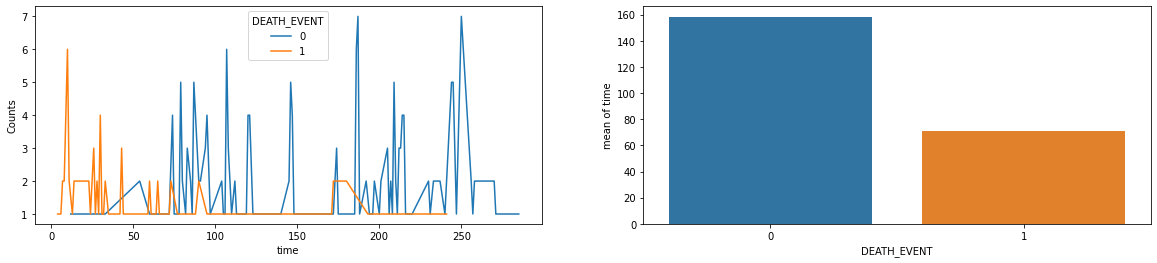

In [17]:
plt.figure(figsize=(20,4))
plt.subplot(121)
tidel=data.groupby(['time','DEATH_EVENT'])['DEATH_EVENT'].count().reset_index(name='Counts')
sns.lineplot(data=tidel, x='time', y='Counts', hue='DEATH_EVENT' )
plt.ylabel("Counts")

plt.subplot(122)
tideb=data.groupby(['DEATH_EVENT'])['time'].mean().sort_values(ascending=False).reset_index(name='mean of time')
sns.barplot(data=tideb, x='DEATH_EVENT', y='mean of time')
plt.show()

- Pasien yang telah meninggal memiliki rata-rata waktu follow up pengobatan lebih rendah daripada yang masih hidup.

## 4.6 Cek apakah ejection_fraction dan serum creatinine memiliki korelasi dengan kematian pasien?

<AxesSubplot:xlabel='ejection_fraction', ylabel='serum_creatinine'>

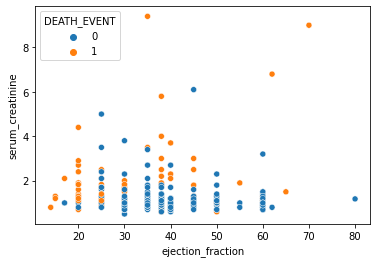

In [18]:
sns.scatterplot(data=data, x='ejection_fraction', y='serum_creatinine', hue="DEATH_EVENT")

**- Berdasarkan data diatas, dapat kita lihat bahwa death event banyak tersebar pada saat serum_creatinine dan ejection_fraction dibawah 50.**

## Feature Selection after EDA

**Berdasarkan hasil EDA, saya memilih untuk menggunakan keseluruhan data, karena seluruh data tersebut mengandung informasi penting yang mendukung untuk mengetahui kondisi kesehatan pasien baik yang masih hidup ataupun yang telah meninggal**

---
# 5. Data Preprocessing

## 5.1 Mengambil data untuk model inference

Mengambil sample acak inference

In [19]:
data_inf = data.sample(10, random_state=20)
data_inf

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
210  58.0        1                        60         0                 38   
217  75.0        0                        99         0                 38   
28   50.0        1                       249         1                 35   
117  60.0        1                        47         0                 20   
131  63.0        1                       514         1                 25   
293  60.0        1                        95         0                 60   
72   51.0        0                       582         1                 40   
238  66.0        1                        72         0                 40   
61   58.0        1                       400         0                 40   
98   75.0        0                       675         1                 60   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
210                    0   153000.0               5.8           134    1   
217                    1   224000.0               2.5           134    1   
28                     1   319000.0               1.0           128    0   
117                    0   204000.0               0.7           139    1   
131                    1   254000.0               1.3           134    1   
293                    0   337000.0               1.0           138    1   
72                     0   221000.0               0.9           134    0   
238                    1   242000.0               1.2           134    1   
61                     0   164000.0               1.0           139    0   
98                     0   265000.0               1.4           125    0   

     smoking  time  DEATH_EVENT  
210        0    26            1  
217        0   162            1  
28         0    28            1  
117        1    73            1  
131        0    83            0  
293        1   146            0  
72         0   244            0  
238        0   121            0  
61         0    91            0  
98         0   205            0

Inference set Removal

In [20]:
# Remove Inference Set
data_for_train_test = data.drop(data_inf.index)
data_for_train_test.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  42.0        1                       250         1                 15   
1  46.0        0                       168         1                 17   
2  65.0        1                       160         1                 20   
3  53.0        1                        91         0                 20   
4  50.0        1                       582         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    0   213000.0               1.3           136    0   
1                    1   271000.0               2.1           124    0   
2                    0   327000.0               2.7           116    0   
3                    1   418000.0               1.4           139    0   
4                    1   279000.0               1.0           134    0   

   smoking  time  DEATH_EVENT  
0        0    65            1  
1        0   100            1  
2        0     8            1  
3        0    43            1  
4        0   186            0

Reset index dari Inference set

In [21]:
data_for_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

## 5.2 Splitting Data

Tahap awal yang dilakukan adalah melakukan splitting data

In [22]:
data.keys()

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [23]:
X = data_for_train_test.drop(['DEATH_EVENT'], axis=1)
y = data_for_train_test[['DEATH_EVENT']]
y

DEATH_EVENT
0              1
1              1
2              1
3              1
4              0
..           ...
284            0
285            0
286            0
287            0
288            0

[289 rows x 1 columns]

- Split data untuk proses Train dan Test (Train = 80% dan Test = 20%)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=25)
print("Train size :", X_train.shape)
print("Test size :", X_test.shape)

Train size : (245, 12)
Test size : (44, 12)


Berikut adalah sebaran presentase dataset terhadap keseluruhan data :

- **X_train   = 85%**
- **X_test    = 25%**

## 5.3 Handling outliers

In [25]:
X_train.keys()

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'],
      dtype='object')

- **Berdasarkan jenis dari data, handling outliers akan dilakukan pada data yang memiliki jenis numerikal (continuous) saja, sehingga pada X_train hanya dilakukan handling outliers untuk kolom age, 'creatinine_phosphokinase,ejection_fraction, platelets,serum_creatinine, serum_sodium,time.**

kemudian dilakukan cek skewness

In [26]:
num_skewness = ['age', 'creatinine_phosphokinase','ejection_fraction', 'platelets','serum_creatinine', 'serum_sodium','time']
normdis = []
skewdis = []
for iz in num_skewness :
    skewness = X_train[iz].skew()
    print('Skewness of', iz, "=" ,skewness)
    print(30*"==")
    if skewness<0.5 and skewness>-0.5 :
        normdis.append(iz)
    else:
        skewdis.append(iz)

Skewness of age = 0.40111344358622003
Skewness of creatinine_phosphokinase = 4.648322553429846
Skewness of ejection_fraction = 0.5809078125410954
Skewness of platelets = 1.557458243610836
Skewness of serum_creatinine = 4.853621375580264
Skewness of serum_sodium = -1.1832398320509658
Skewness of time = 0.11223873705966023


In [27]:
print("normal distribution :",normdis)
print("skew distribution :", skewdis)

normal distribution : ['age', 'time']
skew distribution : ['creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']


sebagian data adalah skew dan terdapat 2 data dengan distribusi normal, dari kedua tipe tersebut akan digunakan extreme value analysis.

kemudian akan dilakukan cek presentase data outliers untuk memutuskan ditrimming atau tidak?

**Perhitungan lower dan upperboundary pada data skew distribution**

In [28]:
threshold = 1.5
for i in skewdis :
        IQR = X_train[i].quantile(0.75) - X_train[i].quantile(0.25)
        upper = X_train[i].quantile(0.75) + (threshold*IQR)
        lower = X_train[i].quantile(0.25) - (threshold*IQR)
        
        inner = X_train[(X_train[i] < upper) & (X_train[i] > lower)][i].count()
        outer = ((X_train[i].count() - inner) / (X_train[i].count() + inner))*100
        jumlah_out = (X_train[i].count() - inner)
        print(i, "memiliki outliers sebesar =", jumlah_out, "data dengan presentase", outer,"%")
        print("Upperboundary =", upper)
        print("Lowerboundary =", lower)
        print(30*"==+") 
        

creatinine_phosphokinase memiliki outliers sebesar = 23 data dengan presentase 4.925053533190578 %
Upperboundary = 1267.5
Lowerboundary = -560.5
==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+
ejection_fraction memiliki outliers sebesar = 2 data dengan presentase 0.4098360655737705 %
Upperboundary = 67.5
Lowerboundary = 7.5
==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+
platelets memiliki outliers sebesar = 20 data dengan presentase 4.25531914893617 %
Upperboundary = 434000.0
Lowerboundary = 90000.0
==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+
serum_creatinine memiliki outliers sebesar = 23 data dengan presentase 4.925053533190578 %
Upperboundary = 2.1499999999999995
Lowerboundary = 0.15000000000000024
==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+
serum_sodium memiliki outliers sebesar = 3 data dengan presentas

**Perhitungan lower dan upperboundary pada data normal distribution**

In [29]:
for i in normdis :
        upper = X_train[i].mean() + (3*(X_train[i].std()))
        lower = X_train[i].mean() - (3*(X_train[i].std()))
        
        inner = X_train[(X_train[i] < upper) & (X_train[i] > lower)][i].count()
        outer = ((X_train[i].count() - inner) / (X_train[i].count() + inner))*100
        jumlah_out = (X_train[i].count() - inner)
        print(i, "memiliki outliers sebesar =", jumlah_out, "data dengan presentase", outer,"%")
        print("Upperboundary =", upper)
        print("Lowerboundary =", lower)
        print(30*"==+") 

age memiliki outliers sebesar = 0 data dengan presentase 0.0 %
Upperboundary = 96.80682824645822
Lowerboundary = 24.469367671909133
==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+
time memiliki outliers sebesar = 0 data dengan presentase 0.0 %
Upperboundary = 362.91690851879207
Lowerboundary = -101.29241872287372
==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+


Data dengan normal distribution tidak terdapat outliers sehingga tidak perlu dilakukan trimming

Karena masing-masing presentase outliers dengan keseluruhan data masih dibawah 10%, maka outliers yang terdeksi tidak perlu dilakukan trimming dan dapat dilanjutkan ke proses selanjutnya.

In [30]:
print("y_train :",y_train.shape)
print("X_train :",X_train.shape)


y_train : (245, 1)
X_train : (245, 12)


## 5.4 Handling Missing Value

In [31]:
X_train.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
dtype: int64

In [32]:
X_test.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
dtype: int64

- **Karena tidak terdapat missing value pada keseluruhan data yang digunakan (train dan test), maka tahapan handling missing value tidak dilakukan.**

## 5.6 Feature Selection

In [33]:
X_train.head(5)

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
161  44.0        0                       582         1                 30   
162  60.0        1                       257         1                 30   
178  60.0        0                      2261         0                 35   
66   65.0        1                       720         1                 40   
118  62.0        0                       231         0                 25   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
161                    1  263358.03               1.6           130    1   
162                    0  150000.00               1.0           137    1   
178                    1  228000.00               0.9           136    1   
66                     0  257000.00               1.0           136    0   
118                    1  253000.00               0.9           140    1   

     smoking  time  
161        1   244  
162        1   245  
178        0   115  
66         0   210  
118        1    10

Berdasarkan analisa data yang telah dilakukan pada tahap EDA, didapatkan fitur yang berkorelasi dengan target :
- age = numerikal
- platelets = numerikal
- serum_creatinine = numerikal
- serum_sodium = numerikal
- creatinine_phosphokinase = numerikal
- ejection_fraction = numerikal
- time = numerikal
- anemia = nominal
- diabetes = nominal
- high blood pressure = nominal
- sex = nominal
- smoking = nominal


terdapat 7 data numerikal, 5 data nominal

## 5.7 Split Numerical and Categorical 

Untuk mempermudah tahapan feature scaling dan encoding, dilakukan pemisahan antara data categorical dan numerikal terlebih dahulu,, dengan script dibawah ini.

In [34]:
X_train.keys()

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'],
      dtype='object')

In [35]:
num_cols_skew = ['creatinine_phosphokinase',
       'ejection_fraction', 'platelets',
       'serum_creatinine', 'serum_sodium']
num_cols_norm = ['age','time']
nom_cols = ['anaemia', 'diabetes',
       'high_blood_pressure','sex']

Kemudian kolom diurutkan untuk menghindari terjaidnya error pada pipeline karena perbedaan kolom.

In [36]:
final = num_cols_skew + num_cols_norm + nom_cols 

In [37]:
X_train = X_train[final]
X_test = X_test[final]

In [38]:
X_train

creatinine_phosphokinase  ejection_fraction  platelets  serum_creatinine  \
161                       582                 30  263358.03              1.60   
162                       257                 30  150000.00              1.00   
178                      2261                 35  228000.00              0.90   
66                        720                 40  257000.00              1.00   
118                       231                 25  253000.00              0.90   
..                        ...                ...        ...               ...   
253                      1767                 45   73000.00              0.70   
151                       185                 30  266000.00              0.70   
255                       180                 45  263358.03              1.18   
143                       258                 25  198000.00              1.40   
132                       250                 25  262000.00              1.00   

     serum_sodium   age  time  anaemia  diabetes  high_blood_pressure  sex  
161           130  44.0   244        0         1                    1    1  
162           137  60.0   245        1         1                    0    1  
178           136  60.0   115        0         0                    1    1  
66            136  65.0   210        1         1                    0    0  
118           140  62.0    10        0         0                    1    1  
..            ...   ...   ...      ...       ...                  ...  ...  
253           137  63.0   186        1         0                    0    1  
151           141  50.0   112        0         0                    0    1  
255           137  55.0   211        1         0                    0    1  
143           129  65.0   235        1         1                    0    1  
132           136  50.0   120        0         0                    0    1  

[245 rows x 11 columns]

## 5.8 Feature Scaling and Encoding

Dilakukan definisi menggunakan column transformer untuk memasukan scaling dan encoding pada pipeline sklearn

In [39]:
# Make the Feature Engineering Pipeline
# pipeline_fe_fs = ColumnTransformer([('minmaxScaler', MinMaxScaler(), num_cols)])  
pipeline_fe_fs = ColumnTransformer([
    ('minmaxScaler', MinMaxScaler(), num_cols_skew),
    ('OHE', OneHotEncoder(), nom_cols),
    ('stdScaler', StandardScaler(), num_cols_norm)
])  

scaler dan encoder disesuaikan :
- minmax = untuk data numerik dengan distribusi skew
- stdsclaer = untuk data numerik dengan distribusi normal
- onehot encoder =  untuk encoding data kategorikal dengan jenis nominal (bukal ordinal)

---
# 6. Model Definition

Pada tugas ini, kita akan menggunakan beberapa algoritma ensemble learning dan gradient boosting yaitu :

1. Random Forest
2. XGboost

dibawah ini akan dilakukan pendefinisian model dengan :
- initial model (model dengan parameter default)
- model pipeline (Pipeline untuk seriap model dengan langsung melakukan tahapan preprocessing hingga fit model)
- Hyperparameter (pendefinisian hyperparameter untuk setiap model jika berlanjut ke hyperparameter tuning/gridsearch)

In [40]:
randomstate = 17

**Random Forest**

In [41]:
# Initial Model
rf= RandomForestClassifier(random_state=randomstate)

# Model Pipeline
pipe_rf = Pipeline([
    ('preprocessing', pipeline_fe_fs),
    ('rf', rf)
])

# Hyperparameter
params_rf = {
    'rf__n_estimators': [1,10,100,1000],
    'rf__max_depth': ['None',1,10,100],
    'rf__criterion': ["gini", "entropy"]
}

**XGboost**

In [42]:
# Initial Model
xg = GradientBoostingClassifier(random_state=randomstate)

# Model Pipeline
pipe_xg = Pipeline([
    ('preprocessing', pipeline_fe_fs),
    ('xg', xg)
])

# Hyperparameter
params_xg = {
    'xg__learning_rate': [0.1,0.5,1.0],
    'xg__n_estimators': [1,10,100,1000],
    'xg__criterion': ["friedman_mse", "mse", "squared_error"]
}

---
# 7. Model Training

**Pada tahapan ini, dilakukan model training menggunakan model default dengan memanfaatkan pipeline yang telah disiapkan pada model definition**

**Random Forest**

In [43]:
model_rf = pipe_rf.fit(X_train,y_train)

c:\Users\Sanggeni\anaconda3\lib\site-packages\sklearn\pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


**XGboost**

In [44]:
model_xg = pipe_xg.fit(X_train,y_train)

c:\Users\Sanggeni\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


---
# 8. Model Evaluation

**Setelah dilakukan training model, langkah selanjutnya adalah melakukan evaluasi terhadap default model yang telah dilakukan sebelumnya.**

**Analisa Hasil Model Default RF**

In [45]:
y_pred_train1 = model_rf.predict(X_train)
y_pred_test1 = model_rf.predict(X_test)

print(">>> Dataset Train :")
print(classification_report(y_train,y_pred_train1))
print("roc-auc-score :")
print(roc_auc_score(y_train,y_pred_train1))
print(">>> Dataset Test :")
print(classification_report(y_test,y_pred_test1))
print("roc-auc-score :")
print(roc_auc_score(y_test,y_pred_test1))

>>> Dataset Train :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       166
           1       1.00      1.00      1.00        79

    accuracy                           1.00       245
   macro avg       1.00      1.00      1.00       245
weighted avg       1.00      1.00      1.00       245

roc-auc-score :
1.0
>>> Dataset Test :
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        31
           1       0.82      0.69      0.75        13

    accuracy                           0.86        44
   macro avg       0.85      0.81      0.83        44
weighted avg       0.86      0.86      0.86        44

roc-auc-score :
0.8138957816377171



- Dari hasil classsification report diatas, dapat dikatakan bahwa model RF default terjadi overfitting, dengan nilai accuracy yang sempurna pada dataset train.
- Model ini memiliki f-1 score untuk memprediksi **1** yang lebih rendah, hal ini terjadi karena model sedikit melakukan missprediction untuk kategori 1.

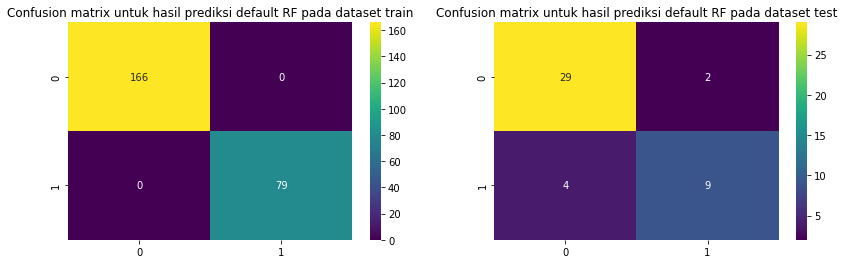

In [46]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.title("Confusion matrix untuk hasil prediksi default RF pada dataset train")
cm1 = confusion_matrix(y_train, y_pred_train1, labels=model_rf.classes_)
sns.heatmap(cm1, annot=True, fmt='g', cmap='viridis')
plt.subplot(122)
plt.title("Confusion matrix untuk hasil prediksi default RF pada dataset test")
cm2 = confusion_matrix(y_test, y_pred_test1, labels=model_rf.classes_)
sns.heatmap(cm2, annot=True, fmt='g', cmap='viridis')
plt.show()

berdasarkan visualisasi confussion matrix diatas, telah terjawab kenapa score pada categori 1 lebih sedikit. hal tersebut karena missprediction pada kategori 1 lebih banyak (4 data)

**Analisa Hasil Model Default XGboost**

In [47]:
y_pred_train2 = model_xg.predict(X_train)
y_pred_test2 = model_xg.predict(X_test)

print(">>> Dataset Train :")
print(classification_report(y_train,y_pred_train2))
print("roc-auc-score :")
print(roc_auc_score(y_train,y_pred_train2))
print(">>> Dataset Test :")
print(classification_report(y_test,y_pred_test2))
print("roc-auc-score :")
print(roc_auc_score(y_test,y_pred_test2))

>>> Dataset Train :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       166
           1       1.00      1.00      1.00        79

    accuracy                           1.00       245
   macro avg       1.00      1.00      1.00       245
weighted avg       1.00      1.00      1.00       245

roc-auc-score :
1.0
>>> Dataset Test :
              precision    recall  f1-score   support

           0       0.93      0.90      0.92        31
           1       0.79      0.85      0.81        13

    accuracy                           0.89        44
   macro avg       0.86      0.87      0.87        44
weighted avg       0.89      0.89      0.89        44

roc-auc-score :
0.8746898263027295


- Dari hasil classsification report diatas, dapat dikatakan bahwa model XGboost terjadi overfitting, namun masih lebih baik daripada RF.

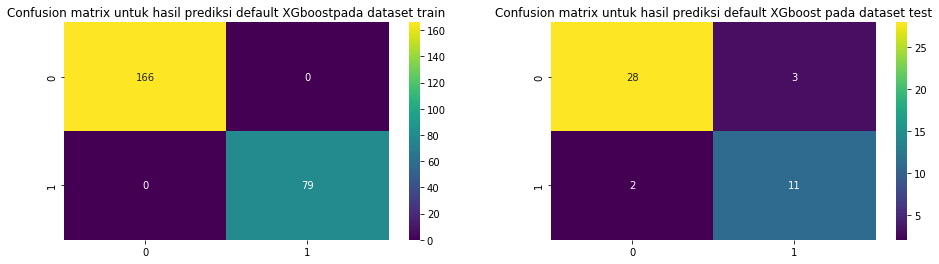

In [48]:
plt.figure(figsize=(16,4))
plt.subplot(121)
plt.title("Confusion matrix untuk hasil prediksi default XGboostpada dataset train")
cm3 = confusion_matrix(y_train, y_pred_train2, labels=model_xg.classes_)
sns.heatmap(cm3, annot=True, fmt='g', cmap='viridis')
plt.subplot(122)
plt.title("Confusion matrix untuk hasil prediksi default XGboost pada dataset test")
cm4 = confusion_matrix(y_test, y_pred_test2, labels=model_xg.classes_)
sns.heatmap(cm4, annot=True, fmt='g', cmap='viridis')
plt.show()

- dibandingkan dengan algoritma RF, dapat dilihat pada confussion matrix test terlihat bahwa nilai FN+FP berkurang satu poin sehingga meningkatkan skor akurasi.  

**Selanjutnya akan dilakukan hyperparameter tuning dengan menggunakan Grid Search CV pada algoritma Random Forest dan XGboost**

**Random Forest**

In [49]:
gscv1 = GridSearchCV(pipe_rf, params_rf, cv=5, scoring='f1')

best_model_gscv1 = gscv1.fit(X_train, y_train)

best_rf_pipe = gscv1.best_estimator_

c:\Users\Sanggeni\anaconda3\lib\site-packages\sklearn\pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
c:\Users\Sanggeni\anaconda3\lib\site-packages\sklearn\pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
c:\Users\Sanggeni\anaconda3\lib\site-packages\sklearn\pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
c:\Users\Sanggeni\anaconda3\lib\site-packages\sklearn\pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was ex

In [50]:
print(gscv1.best_params_)

{'rf__criterion': 'gini', 'rf__max_depth': 10, 'rf__n_estimators': 1000}


In [51]:
y_pred_train1_best = best_rf_pipe.predict(X_train)
y_pred_test1_best = best_rf_pipe.predict(X_test)

print(">>> Dataset Train :")
print(classification_report(y_train,y_pred_train1_best))
print("roc-auc-score :")
print(roc_auc_score(y_train,y_pred_train1_best))
print(">>> Dataset Test :")
print(classification_report(y_test,y_pred_test1_best))
print("roc-auc-score :")
print(roc_auc_score(y_test,y_pred_test1_best))

>>> Dataset Train :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       166
           1       1.00      1.00      1.00        79

    accuracy                           1.00       245
   macro avg       1.00      1.00      1.00       245
weighted avg       1.00      1.00      1.00       245

roc-auc-score :
1.0
>>> Dataset Test :
              precision    recall  f1-score   support

           0       0.91      0.94      0.92        31
           1       0.83      0.77      0.80        13

    accuracy                           0.89        44
   macro avg       0.87      0.85      0.86        44
weighted avg       0.88      0.89      0.88        44

roc-auc-score :
0.8523573200992556


**Analisa Model Best Params RF**
- didapatkan hasil best hypeparameter sebagai berikut : {'rf__criterion': 'gini', 'rf__max_depth': 10, 'rf__n_estimators': 1000}
- Dari hasil classsification report diatas, dapat dikatakan bahwa model RF tersebut masih overfit, namun mengalami peningkatan pada nilai skor akurasi dan roc-auc, sehingga dapat disimpulkan bahwa hyperparameter tuning berhasil dilakukan.

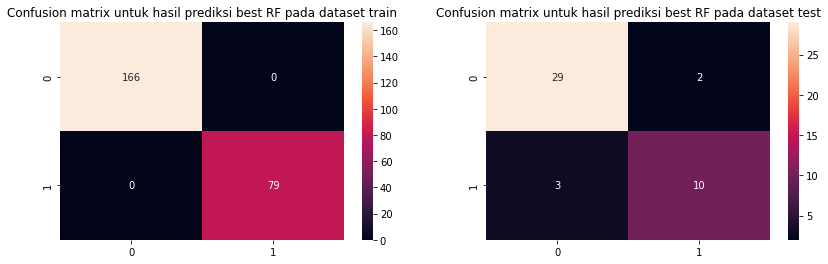

In [52]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.title("Confusion matrix untuk hasil prediksi best RF pada dataset train")
cm5 = confusion_matrix(y_train, y_pred_train1_best, labels=best_rf_pipe.classes_)
sns.heatmap(cm5, annot=True, fmt='g')
plt.subplot(122)
plt.title("Confusion matrix untuk hasil prediksi best RF pada dataset test")
cm6 = confusion_matrix(y_test, y_pred_test1_best, labels=best_rf_pipe.classes_)
sns.heatmap(cm6, annot=True, fmt='g')
plt.show()

- Pada confussion matrix test dapat terlihat bahwa miss prediction FP+FN juga sudah berkurang daripada model default.
- pada model ini lebih banyak miss classification pada FN(3) daripada FP(2) terbalik dengan XGboost default.

**XGboost**

In [53]:
gscv2 = GridSearchCV(pipe_xg, params_xg, cv=5, scoring='f1')

best_model_gscv2 = gscv2.fit(X_train, y_train)

best_xg_pipe = gscv2.best_estimator_

c:\Users\Sanggeni\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Sanggeni\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Sanggeni\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Sanggeni\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

In [54]:
print(gscv2.best_params_)

{'xg__criterion': 'mse', 'xg__learning_rate': 0.5, 'xg__n_estimators': 1000}


In [55]:
y_pred_train2_best = best_xg_pipe.predict(X_train)
y_pred_test2_best = best_xg_pipe.predict(X_test)

print(">>> Dataset Train :")
print(classification_report(y_train,y_pred_train2_best))
print("roc-auc-score :")
print(roc_auc_score(y_train,y_pred_train2_best))
print(">>> Dataset Test :")
print(classification_report(y_test,y_pred_test2_best))
print("roc-auc-score :")
print(roc_auc_score(y_test,y_pred_test2_best))

>>> Dataset Train :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       166
           1       1.00      1.00      1.00        79

    accuracy                           1.00       245
   macro avg       1.00      1.00      1.00       245
weighted avg       1.00      1.00      1.00       245

roc-auc-score :
1.0
>>> Dataset Test :
              precision    recall  f1-score   support

           0       0.93      0.90      0.92        31
           1       0.79      0.85      0.81        13

    accuracy                           0.89        44
   macro avg       0.86      0.87      0.87        44
weighted avg       0.89      0.89      0.89        44

roc-auc-score :
0.8746898263027295


**Analisa Model Best Params XGboost**
- Dari hasil classsification report diatas, Model KNN yang telah dilakukan tuning mengalami sedikit overfitting, karena terlalu mempelajari data training.
- score accuracy dan roc-auc-score pada dataset test menunjukan hasil yang sama dengan model XGboost sebelum tuning.

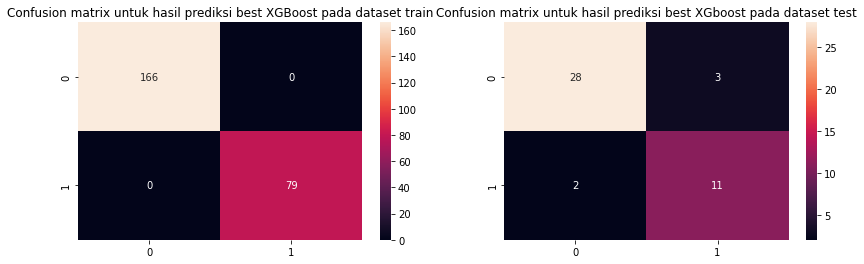

In [56]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.title("Confusion matrix untuk hasil prediksi best XGBoost pada dataset train")
cm7 = confusion_matrix(y_train, y_pred_train2_best, labels=best_xg_pipe.classes_)
sns.heatmap(cm7, annot=True, fmt='g')
plt.subplot(122)
plt.title("Confusion matrix untuk hasil prediksi best XGboost pada dataset test")
cm8 = confusion_matrix(y_test, y_pred_test2_best, labels=best_xg_pipe.classes_)
sns.heatmap(cm8, annot=True, fmt='g')
plt.show()

- Berdasarkan hasil confussion matrix juga dapat terlihat bahwa hasil masih sama dengan XGboost default.

**PEMILIHAN BEST MODEL SECARA KESELURUHAN**

1. **Random Forest default**
    - roc-auc-score train = 1.0
    - roc-auc-score test = 0.814
2. **Random Forest after hyperparameter tuning**
    - roc-auc-score train = 1.0
    - roc-auc-score test = 0.89
3. **XGboost(gradient boosting classifier) Default**
    - roc-auc-score train = 1.0
    - roc-auc-score test = 0.875
4. **XGboost(gradient boosting classifier) after hyperparameter tuning**
    - roc-auc-score train = 1.0
    - roc-auc-score test = 0.875

**Sehingga dari score roc-auc diatas, dapat diambil kesimpulan bahwa model terbaik dengan score roc-auc-score pada dataset test tertinggi adalah XGboost setelah dilakukan tuning hyperparameter, dengan best parameter sebagai berikut :**
- criterion : mse 
- learning_rate : 0.5 
- n_estimators : 1000

---
# 9. Model Savings

Setelah itu seluruh fitur prediktor dan model terbaik akan disave menggunakan library pickle.

In [57]:
# Model Savings

with open('all_feature.txt','w') as file_1 :
    file_1.write(str(final))
    
with open('best_default_model_rf.pkl', 'wb') as file_2 :
    pickle.dump(model_rf,file_2)

with open('best_hyperparams_tuning_rf.pkl', 'wb') as file_3 :
    pickle.dump(best_rf_pipe,file_3)
    
with open('best_default_model_xg.pkl', 'wb') as file_4 :
    pickle.dump(model_xg,file_4)

with open('best_hyperparams_tuning_xg.pkl', 'wb') as file_5 :
    pickle.dump(best_xg_pipe,file_5)

---
# 10. Model Inference

In [58]:
data_inf

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  58.0        1                        60         0                 38   
1  75.0        0                        99         0                 38   
2  50.0        1                       249         1                 35   
3  60.0        1                        47         0                 20   
4  63.0        1                       514         1                 25   
5  60.0        1                        95         0                 60   
6  51.0        0                       582         1                 40   
7  66.0        1                        72         0                 40   
8  58.0        1                       400         0                 40   
9  75.0        0                       675         1                 60   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    0   153000.0               5.8           134    1   
1                    1   224000.0               2.5           134    1   
2                    1   319000.0               1.0           128    0   
3                    0   204000.0               0.7           139    1   
4                    1   254000.0               1.3           134    1   
5                    0   337000.0               1.0           138    1   
6                    0   221000.0               0.9           134    0   
7                    1   242000.0               1.2           134    1   
8                    0   164000.0               1.0           139    0   
9                    0   265000.0               1.4           125    0   

   smoking  time  DEATH_EVENT  
0        0    26            1  
1        0   162            1  
2        0    28            1  
3        1    73            1  
4        0    83            0  
5        1   146            0  
6        0   244            0  
7        0   121            0  
8        0    91            0  
9        0   205            0

**Load Model**

In [59]:
with open('all_feature.txt','r') as file_1:
    all_feature_predictor = file_1.read()
with open('best_default_model_xg.pkl','rb') as file_2:
    model_def_xg = pickle.load(file_2)
with open('best_hyperparams_tuning_xg.pkl','rb') as file_3:
    model_hyp_tune_xg = pickle.load(file_3)

**Pick The Predictor**

In [60]:
all_feature_predictor = ast.literal_eval(all_feature_predictor)
data_inf_final = data_inf[all_feature_predictor]

**Execute the Model (Default NB)**

In [61]:
y_inf_pred1 = model_def_xg.predict(data_inf_final)
y_inf_pred1

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

**Execute the Model (Best Params NB)**

In [62]:
y_inf_pred2 = model_hyp_tune_xg.predict(data_inf_final)
y_inf_pred2

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

**Input to the dataframe to compare with inference data**

In [63]:
y_inf_pred1 = pd.DataFrame(y_inf_pred1, columns=['prediction_default_xg'])
y_inf_pred2 = pd.DataFrame(y_inf_pred2, columns=['prediction_best_xg'])
data_inf__pred_result=pd.concat([data_inf, y_inf_pred1, y_inf_pred2],axis=1)
data_inf__pred_result

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  58.0        1                        60         0                 38   
1  75.0        0                        99         0                 38   
2  50.0        1                       249         1                 35   
3  60.0        1                        47         0                 20   
4  63.0        1                       514         1                 25   
5  60.0        1                        95         0                 60   
6  51.0        0                       582         1                 40   
7  66.0        1                        72         0                 40   
8  58.0        1                       400         0                 40   
9  75.0        0                       675         1                 60   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    0   153000.0               5.8           134    1   
1                    1   224000.0               2.5           134    1   
2                    1   319000.0               1.0           128    0   
3                    0   204000.0               0.7           139    1   
4                    1   254000.0               1.3           134    1   
5                    0   337000.0               1.0           138    1   
6                    0   221000.0               0.9           134    0   
7                    1   242000.0               1.2           134    1   
8                    0   164000.0               1.0           139    0   
9                    0   265000.0               1.4           125    0   

   smoking  time  DEATH_EVENT  prediction_default_xg  prediction_best_xg  
0        0    26            1                      1                   1  
1        0   162            1                      1                   1  
2        0    28            1                      1                   1  
3        1    73            1                      0                   0  
4        0    83            0                      0                   0  
5        1   146            0                      0                   0  
6        0   244            0                      0                   0  
7        0   121            0                      0                   0  
8        0    91            0                      0                   0  
9        0   205            0                      0                   0

---
# 11. Pengambilan Kesimpulan

## 1. Analisa EDA singkat

DEATH_EVENT (Yes) : 32.10702341137124 %
DEATH_EVENT (No) : 67.89297658862876 %


<AxesSubplot:xlabel='DEATH_EVENT', ylabel='mean of age'>

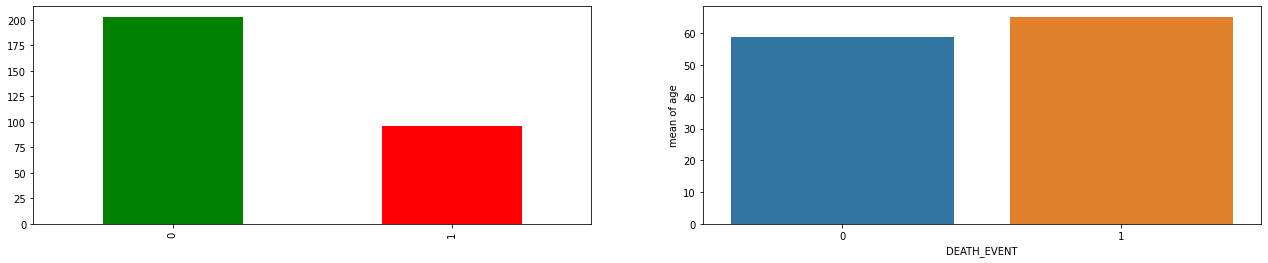

In [64]:
plt.figure(figsize=(22,4))
plt.subplot(121)
data['DEATH_EVENT'].value_counts().plot(kind="bar", color=("green","red"))
yes=data[data['DEATH_EVENT']==1]["DEATH_EVENT"].count()
no=data[data['DEATH_EVENT']==0]["DEATH_EVENT"].count()
print("DEATH_EVENT (Yes) :",yes/(yes+no)*100 , "%")
print("DEATH_EVENT (No) :",no/(yes+no)*100 , "%")

plt.subplot(122)
agdeb=data.groupby(['DEATH_EVENT'])['age'].mean().sort_values(ascending=False).reset_index(name='mean of age')
sns.barplot(data=agdeb, x='DEATH_EVENT', y='mean of age')

Pada dataset ini target yang akan diprediksi adalah kemungkinan pasien akan meninggal atau tidak selama menjalani pengobatan. Pada keseluruhan dataset terlihat bahwa data target tidaklah balance dengan distribusi sebagai berikut :

- DEATH_EVENT (Yes) : 32.10702341137124 %
- DEATH_EVENT (No) : 67.89297658862876 %

Selain itu juga didapatkan insight bahwa pasien yang meninggal memiliki rata-rata umur yang lebih tinggi daripada yang masih hidup.

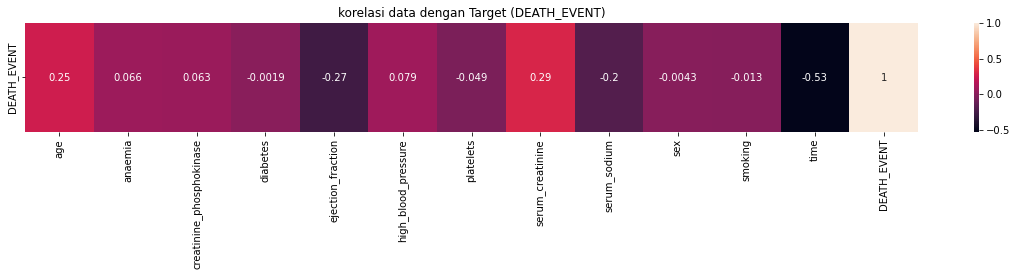

In [65]:
plt.figure(figsize=(20,2))
plt.title("korelasi data dengan Target (DEATH_EVENT)")
sns.heatmap(data.corr().loc[["DEATH_EVENT"]], annot=True)
plt.show()

kemudian berdasarkan hasil EDA, saya akan menggunakan seluruh data, karena data tidak terlalu banyak dan keseluruhan data secara teori memang berpengaruh terhadap tingkat keparahan penyakit jantung. jadi fitur yang digunakan sebagai input untuk membentuk model adalah fitur-fitur berikut :

- age = numerikal
- platelets = numerikal
- serum_creatinine = numerikal
- serum_sodium = numerikal
- creatinine_phosphokinase = numerikal
- ejection_fraction = numerikal
- time = numerikal
- anemia = nominal
- diabetes = nominal
- high blood pressure = nominal
- sex = nominal
- smoking = nominal

terdapat 7 data numerikal, 5 data nominal

## 2. Pemilihan model terbaik

1. **Random Forest default**
    - roc-auc-score train = 1.0
    - roc-auc-score test = 0.814
2. **Random Forest after hyperparameter tuning**
    - roc-auc-score train = 1.0
    - roc-auc-score test = 0.89
3. **XGboost(gradient boosting classifier) Default**
    - roc-auc-score train = 1.0
    - roc-auc-score test = 0.875
4. **XGboost(gradient boosting classifier) after hyperparameter tuning**
    - roc-auc-score train = 1.0
    - roc-auc-score test = 0.875

**Dari score roc-auc diatas, dapat diambil kesimpulan bahwa model terbaik dengan score roc-auc-score pada dataset test tertinggi adalah model XGboost setelah dilakukan tuning hyperparameter, kenapa diambil setelah tuning, selain roc-auc-score, nilai yang pertimbangkan adalah accuracy, dan setalh dituning accuracy bertambah, sehingga saya memutuskan untuk memilih XGboost setelah tuning sebagai model terbaik.**

Selain itu, model ini memiliki akurasi yang cukup tinggi dalam memprediksi kedua jenis kategori pada target prediksi (0 dan 1).

## 3. Conceptual Problems 

1. Apakah yang dimaksud dengan Bagging?
    - Bagging adalah salah satu metode ensemble learning yang melakukan training menggunakan beberapa classifier secara paralel, hasil training dari berbagai classifier tersebut kemudian dikombinasi untuk menghasilkan prediksi akhir dari sistem learning.
    
___
2. Jelaskan perbedaan algoritma Random Forest dengan algoritma boosting yang Anda pilih?
    - random forest adalah salah satu algoritma ensemble learning dengan teknik bagging, random forest ini gabungan dari banyak decision tree yang tersusun secara paralel. Sedangkan XGboost adalah implementasi lanjut dari gradient boosting, XGboost ini menggabungkan beberapa set learning (tree) yang sebelumnya lemah menjadi model yang kuat sehingga menghasilkan prediksi yang baik.